In [11]:
from numpy import *
import numpy as np


def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])#numpy中的数组(4,2)
    labels = ['A','A','B','B']#标签
    return group,labels

In [3]:
group, labels = createDataSet()
print(group,labels)
print(group.shape)#读取矩阵的长度

[[ 1.   1.1]
 [ 1.   1. ]
 [ 0.   0. ]
 [ 0.   0.1]] ['A', 'A', 'B', 'B']
(4, 2)


In [4]:
#k-近邻算法核心代码
#四个参数分别为:用于分类的输入向量inX,输入的训练样本集dataSet,标签向量labels,k表示用于选择最近邻居的数目
def classify0(x, dataSet, labels, k):
    size = dataSet.shape[0]#读取第一维度的长度
    diffMat = np.tile(x, (size, 1)) - dataSet
    #tile(x,(4,1))在列方向上重复[1,1]1次，行4次，即创建一个数组和原数据集形状相同
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis = 1)#axis=1代表将一个矩阵的每一行向量相加
    distances = sqDistances ** 0.5#开根号
    sortedDisIndicies = distances.argsort()#排序
    classCount = {}#定义一个字典
    for i in np.arange(k):#找到前k个数据，放入字典中
        voteIlabel = labels[sortedDisIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    
    value = -1
    for key in classCount:
        if value < classCount[key]:
            flag = key
            value = classCount[key]
    return flag
    
group, labels = createDataSet()#创建数据集
classify0([1,1], group, labels, 3)#测试[1,1]属于哪个分类，找最近的3个数据实验

'A'

In [5]:
# 将文本记录转换为 Numpy 的解析程序
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()#按行读取文件内容
    numberOfLines = len(arrayOLines)#文件的行数
    returnMat = np.ones((numberOfLines, 3))#创建数组。行数为numberOfLines，列数为3
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip().split('\t')#split('\t')让数据以制表符大小进行切片，strip()移除头尾的空格
        returnMat[index, :] = line[0:3]
        if line[-1] == 'largeDoses':#把标签处理为数字
            tt = 3
        elif line[-1] == 'smallDoses':
            tt = 2
        else:
            tt = 1
        
        classLabelVector.append(tt)#最后一行作为标签
        index += 1
    return returnMat, classLabelVector

x, y = file2matrix(r'E:\Program Files\Machine Learning\机器学习实战及配套代码\machinelearninginaction\Ch02\datingTestSet.txt')
print(x)

print(type(x))#x的类型是一个数组
print(type(y))#y的类型是一个列表
print(x.shape)
print(np.array(y).shape)#np.array(y)把list类型换成array类型

[[  4.09200000e+04   8.32697600e+00   9.53952000e-01]
 [  1.44880000e+04   7.15346900e+00   1.67390400e+00]
 [  2.60520000e+04   1.44187100e+00   8.05124000e-01]
 ..., 
 [  2.65750000e+04   1.06501020e+01   8.66627000e-01]
 [  4.81110000e+04   9.13452800e+00   7.28045000e-01]
 [  4.37570000e+04   7.88260100e+00   1.33244600e+00]]
<class 'numpy.ndarray'>
<class 'list'>
(1000, 3)
(1000,)


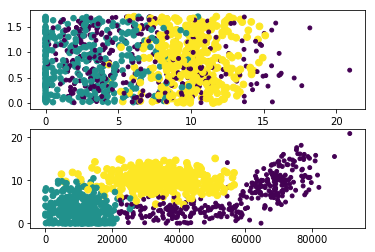

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()#定义一个figure对象 导出一张画纸
x, y = file2matrix(r'E:\Program Files\Machine Learning\机器学习实战及配套代码\machinelearninginaction\Ch02\datingTestSet.txt')
# ax.scatter(x[:, 1], x[:, 2]) # 效果不好，无样本分类，

ax1 = fig.add_subplot(2,1,1)#2行1列第一个 add_subplot创建一个subplot,图像是2*1的，选中第一个
ax1.scatter(x[:, 1], x[:, 2], 15.0 * np.array(y), 15.0 * np.array(y)) #颜色和尺寸标识了数据点的属性类别
# x[:, 1], x[:, 2]输入的数组  15.0 * np.array(y)标量 15.0 * np.array(y)颜色
#x[:, 0]取所有行的第0个数据
ax2 = fig.add_subplot(2,1,2)
ax2.scatter(x[:, 0], x[:, 1], 15.0 * np.array(y), 15.0 * np.array(y)) #颜色和尺寸标识了数据点的属性类别
plt.show()

In [9]:
#准备数据：归一化数值
def autoNorm(dataSet):
    minVals = dataSet.min(0)#将每列的最小值放在minVals中
    maxVals = dataSet.max(0)#将每列的最大值放在minVals中
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))#创建一个空数组
    m = dataSet.shape[0]#数据集第一维的长度为3
    normDataSet = dataSet - np.tile(minVals, (m, 1))#该列重复行1次，列3次
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

x, y = file2matrix(r'E:\Program Files\Machine Learning\机器学习实战及配套代码\machinelearninginaction\Ch02\datingTestSet.txt')
normMat, ranges, minVals = autoNorm(x)
#print(normMat)#自行测试各个不太懂的数据
#print(ranges)
print(minVals)

[ 0.        0.        0.001156]


In [10]:
# 分类器针对约会网站的测试代码
def datingClassTest():
    hoRatio = 0.10
    datingDataMat, datingLabels = file2matrix(r'E:\Program Files\Machine Learning\机器学习实战及配套代码\machinelearninginaction\Ch02\datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)#归一化
    m = normMat.shape[0]#第一维长度
    numTestVecs = int(m * hoRatio)#决定多少用于训练，多少用于测试
    errorCount = 0.0
    for i in np.arange(numTestVecs):#用于测试的数据
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)#输出训练结果
        print("thr classifier came back with: %d, the real answer is: %d" %(classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:#计算误差
            errorCount += 1.0
    print("the total error rate is: %f" %( errorCount / float(numTestVecs)))

datingClassTest()

thr classifier came back with: 3, the real answer is: 3
thr classifier came back with: 2, the real answer is: 2
thr classifier came back with: 1, the real answer is: 1
thr classifier came back with: 1, the real answer is: 1
thr classifier came back with: 1, the real answer is: 1
thr classifier came back with: 1, the real answer is: 1
thr classifier came back with: 3, the real answer is: 3
thr classifier came back with: 3, the real answer is: 3
thr classifier came back with: 1, the real answer is: 1
thr classifier came back with: 3, the real answer is: 3
thr classifier came back with: 1, the real answer is: 1
thr classifier came back with: 1, the real answer is: 1
thr classifier came back with: 2, the real answer is: 2
thr classifier came back with: 1, the real answer is: 1
thr classifier came back with: 1, the real answer is: 1
thr classifier came back with: 1, the real answer is: 1
thr classifier came back with: 1, the real answer is: 1
thr classifier came back with: 1, the real answe

In [12]:
# 约会网站预测函数
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input('percentage of time spent playing video games?'))#输入
    ffMiles = float(input('frequent flier miles earned per year?'))
    iceCream = float(input('liters of ice cream consumed per year?'))
    datingDataMat, datingLabels = file2matrix(r'E:\Program Files\Machine Learning\机器学习实战及配套代码\machinelearninginaction\Ch02\datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)#归一化
    inArr = np.array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr - minVals) / ranges, normMat, datingLabels, 3)#预测结果
    print("You will probably like this person: ", resultList[classifierResult - 1])

classifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year?10000
liters of ice cream consumed per year?0.5
You will probably like this person:  not at all


In [27]:
# 准备数据：将图像转换为测试向量
def img2vector(filename):
    returnVect = np.zeros((1, 1024))
    fr = open(filename)
    for i in np.arange(32):#按行读取
        lineStr = fr.readline()
        for j in np.arange(32):
            returnVect[0, 32 * i + j] = int(lineStr[j])
    return returnVect

returnVect = img2vector(r'E:\Program Files\Machine Learning\机器学习实战及配套代码\machinelearninginaction\Ch02\testDigits\0_13.txt')
print(returnVect[0, 0:31])
print(returnVect[0, 32:63])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [28]:
# 测试算法：使用 K-近邻算法识别手写数字

from os import listdir # 从 os 模块中导入函数 listdir ，它可以列出给定目录的文件名
def handwritingClassTest():
    hwLabels = []
    #训练集
    trainingFileList = listdir(r'E:\Program Files\Machine Learning\机器学习实战及配套代码\machinelearninginaction\Ch02\trainingDigits')
    #print(trainingFileList)提取文件名
    m = len(trainingFileList)#文件的长度
    trainingMat = np.zeros((m, 1024))#创建一个空的一维数据
    for i in np.arange(m):
        fileNameStr = trainingFileList[i]#0_0.txt
        fileStr = fileNameStr.split('.')[0]#提取0_0
        classNumStr = int(fileStr.split('_')[0])#提取0
        hwLabels.append(classNumStr)#添加标签
        trainingMat[i, :] = img2vector(r'E:\Program Files\Machine Learning\机器学习实战及配套代码\machinelearninginaction\Ch02\trainingDigits\%s' % fileNameStr )
    #测试集
    testFileList = listdir(r'E:\Program Files\Machine Learning\机器学习实战及配套代码\machinelearninginaction\Ch02\testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in np.arange(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector(r'E:\Program Files\Machine Learning\机器学习实战及配套代码\machinelearninginaction\Ch02\testDigits\%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print("the classifier came back with: %d, the real answer is: %d " %(classifierResult, classNumStr))
        if classifierResult != classNumStr :
            errorCount += 1.0
    print("\nthe total number of error is: %d" % errorCount)
    print("\nthe total error rate is: %f " %(errorCount / float(mTest)))

    
handwritingClassTest()

['0_0.txt', '0_1.txt', '0_10.txt', '0_100.txt', '0_101.txt', '0_102.txt', '0_103.txt', '0_104.txt', '0_105.txt', '0_106.txt', '0_107.txt', '0_108.txt', '0_109.txt', '0_11.txt', '0_110.txt', '0_111.txt', '0_112.txt', '0_113.txt', '0_114.txt', '0_115.txt', '0_116.txt', '0_117.txt', '0_118.txt', '0_119.txt', '0_12.txt', '0_120.txt', '0_121.txt', '0_122.txt', '0_123.txt', '0_124.txt', '0_125.txt', '0_126.txt', '0_127.txt', '0_128.txt', '0_129.txt', '0_13.txt', '0_130.txt', '0_131.txt', '0_132.txt', '0_133.txt', '0_134.txt', '0_135.txt', '0_136.txt', '0_137.txt', '0_138.txt', '0_139.txt', '0_14.txt', '0_140.txt', '0_141.txt', '0_142.txt', '0_143.txt', '0_144.txt', '0_145.txt', '0_146.txt', '0_147.txt', '0_148.txt', '0_149.txt', '0_15.txt', '0_150.txt', '0_151.txt', '0_152.txt', '0_153.txt', '0_154.txt', '0_155.txt', '0_156.txt', '0_157.txt', '0_158.txt', '0_159.txt', '0_16.txt', '0_160.txt', '0_161.txt', '0_162.txt', '0_163.txt', '0_164.txt', '0_165.txt', '0_166.txt', '0_167.txt', '0_168.tx

the classifier came back with: 0, the real answer is: 0 
the classifier came back with: 0, the real answer is: 0 
the classifier came back with: 0, the real answer is: 0 
the classifier came back with: 0, the real answer is: 0 
the classifier came back with: 0, the real answer is: 0 
the classifier came back with: 0, the real answer is: 0 
the classifier came back with: 0, the real answer is: 0 
the classifier came back with: 0, the real answer is: 0 
the classifier came back with: 0, the real answer is: 0 
the classifier came back with: 0, the real answer is: 0 
the classifier came back with: 0, the real answer is: 0 
the classifier came back with: 0, the real answer is: 0 
the classifier came back with: 0, the real answer is: 0 
the classifier came back with: 0, the real answer is: 0 
the classifier came back with: 0, the real answer is: 0 
the classifier came back with: 0, the real answer is: 0 
the classifier came back with: 0, the real answer is: 0 
the classifier came back with: 

the classifier came back with: 1, the real answer is: 1 
the classifier came back with: 1, the real answer is: 1 
the classifier came back with: 1, the real answer is: 1 
the classifier came back with: 1, the real answer is: 1 
the classifier came back with: 1, the real answer is: 1 
the classifier came back with: 1, the real answer is: 1 
the classifier came back with: 1, the real answer is: 1 
the classifier came back with: 1, the real answer is: 1 
the classifier came back with: 1, the real answer is: 1 
the classifier came back with: 1, the real answer is: 1 
the classifier came back with: 1, the real answer is: 1 
the classifier came back with: 1, the real answer is: 1 
the classifier came back with: 1, the real answer is: 1 
the classifier came back with: 1, the real answer is: 1 
the classifier came back with: 1, the real answer is: 1 
the classifier came back with: 1, the real answer is: 1 
the classifier came back with: 1, the real answer is: 1 
the classifier came back with: 

the classifier came back with: 3, the real answer is: 3 
the classifier came back with: 3, the real answer is: 3 
the classifier came back with: 3, the real answer is: 3 
the classifier came back with: 3, the real answer is: 3 
the classifier came back with: 3, the real answer is: 3 
the classifier came back with: 3, the real answer is: 3 
the classifier came back with: 3, the real answer is: 3 
the classifier came back with: 3, the real answer is: 3 
the classifier came back with: 3, the real answer is: 3 
the classifier came back with: 3, the real answer is: 3 
the classifier came back with: 3, the real answer is: 3 
the classifier came back with: 3, the real answer is: 3 
the classifier came back with: 3, the real answer is: 3 
the classifier came back with: 3, the real answer is: 3 
the classifier came back with: 3, the real answer is: 3 
the classifier came back with: 3, the real answer is: 3 
the classifier came back with: 3, the real answer is: 3 
the classifier came back with: 

the classifier came back with: 4, the real answer is: 4 
the classifier came back with: 4, the real answer is: 4 
the classifier came back with: 4, the real answer is: 4 
the classifier came back with: 4, the real answer is: 4 
the classifier came back with: 4, the real answer is: 4 
the classifier came back with: 4, the real answer is: 4 
the classifier came back with: 4, the real answer is: 4 
the classifier came back with: 4, the real answer is: 4 
the classifier came back with: 4, the real answer is: 4 
the classifier came back with: 4, the real answer is: 4 
the classifier came back with: 4, the real answer is: 4 
the classifier came back with: 4, the real answer is: 4 
the classifier came back with: 4, the real answer is: 4 
the classifier came back with: 4, the real answer is: 4 
the classifier came back with: 4, the real answer is: 4 
the classifier came back with: 4, the real answer is: 4 
the classifier came back with: 4, the real answer is: 4 
the classifier came back with: 

the classifier came back with: 6, the real answer is: 6 
the classifier came back with: 6, the real answer is: 6 
the classifier came back with: 6, the real answer is: 6 
the classifier came back with: 6, the real answer is: 6 
the classifier came back with: 6, the real answer is: 6 
the classifier came back with: 6, the real answer is: 6 
the classifier came back with: 6, the real answer is: 6 
the classifier came back with: 6, the real answer is: 6 
the classifier came back with: 6, the real answer is: 6 
the classifier came back with: 6, the real answer is: 6 
the classifier came back with: 6, the real answer is: 6 
the classifier came back with: 6, the real answer is: 6 
the classifier came back with: 6, the real answer is: 6 
the classifier came back with: 6, the real answer is: 6 
the classifier came back with: 6, the real answer is: 6 
the classifier came back with: 6, the real answer is: 6 
the classifier came back with: 6, the real answer is: 6 
the classifier came back with: 

the classifier came back with: 7, the real answer is: 7 
the classifier came back with: 7, the real answer is: 7 
the classifier came back with: 7, the real answer is: 7 
the classifier came back with: 7, the real answer is: 7 
the classifier came back with: 7, the real answer is: 7 
the classifier came back with: 7, the real answer is: 7 
the classifier came back with: 7, the real answer is: 7 
the classifier came back with: 7, the real answer is: 7 
the classifier came back with: 7, the real answer is: 7 
the classifier came back with: 7, the real answer is: 7 
the classifier came back with: 7, the real answer is: 7 
the classifier came back with: 7, the real answer is: 7 
the classifier came back with: 7, the real answer is: 7 
the classifier came back with: 7, the real answer is: 7 
the classifier came back with: 7, the real answer is: 7 
the classifier came back with: 7, the real answer is: 7 
the classifier came back with: 7, the real answer is: 7 
the classifier came back with: 

the classifier came back with: 9, the real answer is: 9 
the classifier came back with: 9, the real answer is: 9 
the classifier came back with: 9, the real answer is: 9 
the classifier came back with: 9, the real answer is: 9 
the classifier came back with: 9, the real answer is: 9 
the classifier came back with: 9, the real answer is: 9 
the classifier came back with: 9, the real answer is: 9 
the classifier came back with: 9, the real answer is: 9 
the classifier came back with: 9, the real answer is: 9 
the classifier came back with: 9, the real answer is: 9 
the classifier came back with: 9, the real answer is: 9 
the classifier came back with: 9, the real answer is: 9 
the classifier came back with: 9, the real answer is: 9 
the classifier came back with: 9, the real answer is: 9 
the classifier came back with: 9, the real answer is: 9 
the classifier came back with: 9, the real answer is: 9 
the classifier came back with: 9, the real answer is: 9 
the classifier came back with: 

In [1]:
b = np.array([[1,2,3,4,5]])
print(b)

NameError: name 'np' is not defined

In [2]:
import numpy as np
b = np.array([[1,2,3,4,5]])
print(b)

[[1 2 3 4 5]]


In [3]:
print(b.shape)

(1, 5)


In [4]:
a = np.array([1,2,3])
b = np.array([1,2,3])
c= a.dot(b)
print(c)
print(c.shape)

14
()


In [10]:
#python 字典 get()函数作用
#classCount.get(voteIlabel, 0)返回字典classCount中voteIlabel元素对应的值，若无，则进行初始化为0
#初始化的值即为get()的第二个参数，第一次遇到标签A，classCount.get(voteIlabel, 0)值为0，
#第一次遇到标签A，classCount.get(voteIlabel, 0)时，值加1
import numpy as np
labels = ['A', 'A', 'B', 'B']
sortedDisIndicies =[1,2,3]
classCount = {}
for i in np.arange(3):
        # 按照从小到大，依次取出相应的 label
        voteIlabel = labels[sortedDisIndicies[i]]
        print(voteIlabel,classCount.get(voteIlabel, 0))
        # 如果字典中没该 label 就添加 value 为 1 ，如果有，则在原来基础上 value + 1
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
        
        print(voteIlabel,classCount[voteIlabel])



A 1
A 2
B 1
B 2
B 2
B 3


In [16]:
print(classCount)
value = -1
#key是字典的键，classCount[key]该键对应的值
for key in classCount:
    if value < classCount[key]:
        flag = key
        print(flag)
        value = classCount[key]
        print(value)

{'A': 2, 'B': 3}
A
2
B
3
